In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [225]:
import warnings 
warnings.filterwarnings("ignore")

In [226]:
customers_details = pd.read_csv("Hospitalisation details.csv")
customers_details.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [227]:
medical_details = pd.read_csv('Medical Examinations.csv')
medical_details.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [228]:
customer_names = pd.read_excel("Names.xlsx")
customer_names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


# 1. Collate the files so that all the information is in one place.

In [229]:
customer_df = pd.merge(customers_details,customer_names,on="Customer ID")
customer_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan"


In [230]:
final_df = pd.merge(customer_df,medical_details,on="Customer ID")
final_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K",17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P",17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie",16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan",22.34,5.57,No,No,No,1,No


In [231]:
final_df.shape

(2335, 17)

# 2. Check for missing values in the dataset.

In [232]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   name                    2335 non-null   object 
 10  BMI                     2335 non-null   float64
 11  HBA1C                   2335 non-null   float64
 12  Heart Issues            2335 non-null   object 
 13  Any Transplants         2335 non-null   object 
 14  Cancer history          2335 non-null   

In [233]:
final_df.dtypes.value_counts()

object     12
float64     3
int64       2
dtype: int64

In [234]:
final_df.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
name                      0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64

In [235]:
## there are no null values in the dataset . 

In [236]:
final_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K",17.580,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P",17.600,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie",16.470,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.700,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan",22.340,5.57,No,No,No,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,"Kadala, Ms. Kristyn",35.530,5.45,No,No,No,No major surgery,yes
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,"Osborne, Ms. Kelsey",38.095,6.05,No,No,No,No major surgery,yes
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,"Lehner, Mr. Matthew D",30.360,5.77,No,No,No,No major surgery,yes


# 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if 
they do not contain significant information

In [237]:
trivial_df=final_df[final_df.eq("?").any(1)]
trivial_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
11,Id2324,1999,Dec,26,0,700.00,?,tier - 3,R1013,"Duffy, Ms. Meghan K",22.240,5.04,No,No,No,No major surgery,No
13,Id2322,2002,?,19,0,750.00,tier - 3,tier - 1,R1012,"Street, Ms. Holly",21.380,8.01,No,No,No,No major surgery,No
17,Id2318,1996,?,18,0,770.38,tier - 3,?,R1012,"Gagnon, Ms. Candice M",18.820,5.51,yes,No,No,No major surgery,No
542,Id1793,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,"Capriolo, Mr. Michael",18.905,4.91,yes,No,No,1,No
1046,Id1289,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,"Levine, Ms. Annie J.",24.320,11.56,yes,No,No,1,No
1049,Id1286,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,"Ainsley, Ms. Katie M.",29.370,8.01,yes,No,No,1,No
1700,Id635,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,"Bruns, Mr. Zachary T",25.175,4.96,No,yes,No,1,?
1775,Id560,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,"Pearlman, Mr. Oz",23.980,4.90,No,No,No,No major surgery,?
2165,Id170,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,"Torphy, Mr. Bobby",37.620,6.32,yes,yes,No,2,yes
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,"Lu, Mr. Phil",34.485,11.87,yes,No,No,2,yes


In [238]:
trivial_df.shape

(10, 17)

In [239]:
round(trivial_df.shape[0]/final_df.shape[0]*100,2)

0.43

In [240]:
# .43 contains such trivial values that needs to be removed .

In [241]:
final_df.drop(final_df[final_df.eq("?").any(1)].index,axis=0,inplace=True)

In [242]:
final_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K",17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P",17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie",16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan",22.34,5.57,No,No,No,1,No


In [243]:
final_df.shape

(2325, 17)

# 4. Use the necessary transformation methods to deal with the nominal and ordinal 
categorical variables in the dataset


In [244]:
# dealing with the nominal categorical variables first
final_df["Heart Issues"].value_counts()


No     1405
yes     920
Name: Heart Issues, dtype: int64

In [245]:
final_df["Any Transplants"].value_counts()

No     2183
yes     142
Name: Any Transplants, dtype: int64

In [246]:
final_df["Cancer history"].value_counts()

No     1934
Yes     391
Name: Cancer history, dtype: int64

In [247]:
final_df["smoker"].value_counts()

No     1839
yes     486
Name: smoker, dtype: int64

In [248]:
#transforming categorical values to numerical values by using label encoder
from sklearn.preprocessing import LabelEncoder

In [249]:
en = LabelEncoder()

In [250]:
final_df["Heart Issues"] = en.fit_transform(final_df["Heart Issues"])

In [251]:
final_df["smoker"] = en.fit_transform(final_df["smoker"])

In [252]:
final_df["Any Transplants"] = en.fit_transform(final_df["Any Transplants"])

In [253]:
final_df["Cancer history"] = en.fit_transform(final_df["Cancer history"])

In [254]:
final_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,"German, Mr. Aaron K",17.58,4.51,0,0,0,1,0
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,"Rosendahl, Mr. Evan P",17.60,4.39,0,0,0,1,0
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,"Albano, Ms. Julie",16.47,6.35,0,0,1,1,0
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.70,6.28,0,0,0,1,0
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,"Brietzke, Mr. Jordan",22.34,5.57,0,0,0,1,0


In [255]:
## dealing with the ordinal variables

In [256]:
def clean_ordinal(ord):
    return int(ord.replace("tier","").replace(" ","").replace("-",""))

In [257]:
final_df["Hospital tier"] = final_df["Hospital tier"].map(clean_ordinal)
final_df["City tier"] = final_df["City tier"].map(clean_ordinal)

In [258]:
final_df["City tier"].value_counts()


2    807
3    789
1    729
Name: City tier, dtype: int64

In [259]:
final_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,"German, Mr. Aaron K",17.58,4.51,0,0,0,1,0
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,"Rosendahl, Mr. Evan P",17.60,4.39,0,0,0,1,0
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,"Albano, Ms. Julie",16.47,6.35,0,0,1,1,0
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",17.70,6.28,0,0,0,1,0
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,"Brietzke, Mr. Jordan",22.34,5.57,0,0,0,1,0


# 5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.


In [260]:
final_df["State ID"].value_counts()

R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: State ID, dtype: int64

In [261]:
# we can see that some are worth important to consider like R1013    609, R1011    574, R1012    572

In [262]:
dummies = pd.get_dummies(final_df["State ID"],prefix="state_id")
dummies

,state_id_R1011,state_id_R1012,state_id_R1013,state_id_R1014,state_id_R1015,state_id_R1016,state_id_R1017,state_id_R1018,state_id_R1019,state_id_R1020,state_id_R1021,state_id_R1022,state_id_R1023,state_id_R1024,state_id_R1025,state_id_R1026
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2330,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2331,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [263]:
dummy = dummies[['state_id_R1013','state_id_R1011','state_id_R1012','state_id_R1024']]

In [264]:
final_df = pd.concat([final_df,dummy],axis=1)

In [265]:
##6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable

In [266]:
final_df["NumberOfMajorSurgeries"].value_counts()

No major surgery    1070
1                    961
2                    272
3                     22
Name: NumberOfMajorSurgeries, dtype: int64

In [267]:
final_df["NumberOfMajorSurgeries"].unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [268]:
final_df["NumberOfMajorSurgeries"] = final_df["NumberOfMajorSurgeries"].replace("No major surgery","0")

In [269]:
final_df["NumberOfMajorSurgeries"] = final_df["NumberOfMajorSurgeries"].astype(int)

In [270]:
final_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,...,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,"German, Mr. Aaron K",...,4.51,0,0,0,1,0,1,0,0,0
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,"Rosendahl, Mr. Evan P",...,4.39,0,0,0,1,0,1,0,0,0
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,"Albano, Ms. Julie",...,6.35,0,0,1,1,0,1,0,0,0
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",...,6.28,0,0,0,1,0,1,0,0,0
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,"Brietzke, Mr. Jordan",...,5.57,0,0,0,1,0,1,0,0,0


# The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their 
gender. Make a new field for the beneficiary's gender.

In [271]:
# male =1 female =0
def gender(val):
 if "Ms." in val:
    return 0
 else:
    return 1

In [272]:
final_df["gender"] = final_df["name"].map(gender)

In [273]:
final_df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,name,...,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,gender
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,"German, Mr. Aaron K",...,0,0,0,1,0,1,0,0,0,1
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,"Rosendahl, Mr. Evan P",...,0,0,0,1,0,1,0,0,0,1
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,"Albano, Ms. Julie",...,0,0,1,1,0,1,0,0,0,0
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,"Riveros Gonzalez, Mr. Juan D. Sr.",...,0,0,0,1,0,1,0,0,0,1
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,"Brietzke, Mr. Jordan",...,0,0,0,1,0,1,0,0,0,1


# You should also visualize the distribution of costs using a histogram, box and whisker plot, 
and swarm plot.# 

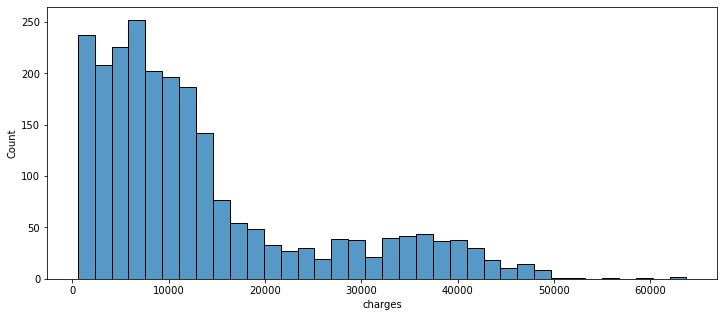

In [274]:
plt.figure(figsize=(12,5))
sns.histplot(final_df["charges"])
plt.show()

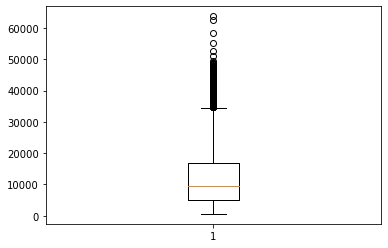

In [275]:
plt.boxplot(final_df["charges"])
plt.show()

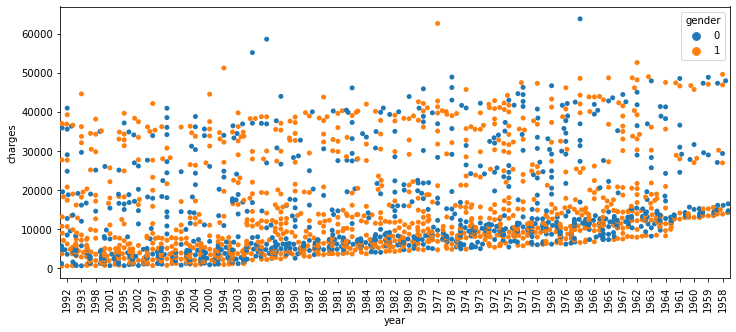

In [276]:
plt.figure(figsize=(12,5))
sns.swarmplot(x='year',y='charges',hue='gender',data=final_df)
plt.xticks(rotation=90)
plt.show()

# State how the distribution is different across gender and tiers of hospitals

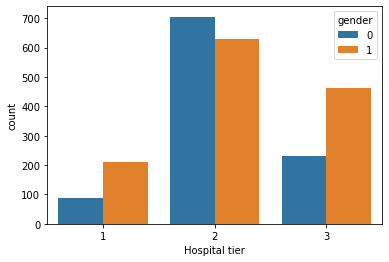

In [277]:
sns.countplot(data=final_df,x="Hospital tier", hue = "gender")
plt.show()

In [278]:
#From the above representation it is clear that the number of female in the tier 1 and 3 is half of the male justbin tier 2 hospital female is little bit more as compare to male.


# . Create a radar chart to showcase the median hospitalization cost for each tier of hospitals# 

In [279]:
print("median cost of tier 1 hospitals:", final_df[final_df["Hospital tier"]==1].charges.median())
print("median cost of tier 2 hospitals:", final_df[final_df["Hospital tier"]==2].charges.median())
print("median cost of tier 3 hospitals:", final_df[final_df["Hospital tier"]==3].charges.median())

median cost of tier 1 hospitals: 32097.434999999998
median cost of tier 2 hospitals: 7168.76
median cost of tier 3 hospitals: 10676.83


In [280]:
df = pd.DataFrame(dict(r=[32097.43, 7168.76, 10676.83],theta=['tier 1 hospital','tier 2 hospital','tier 3 hospital']))
df                       

,r,theta
0,32097.43,tier 1 hospital
1,7168.76,tier 2 hospital
2,10676.83,tier 3 hospital


In [281]:
import plotly.express as px
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()


# 12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals.


In [282]:
final_df["Hospital tier"].value_counts()

2    1334
3     691
1     300
Name: Hospital tier, dtype: int64

In [283]:
city_freq = final_df["City tier"].value_counts().rename_axis('City&hospital_tier').reset_index()
city_freq

,City&hospital_tier,City tier
0,2,807
1,3,789
2,1,729


In [284]:
hospital_freq = final_df["Hospital tier"].value_counts().rename_axis('City&hospital_tier').reset_index()
df = pd.merge(city_freq, hospital_freq, on = 'City&hospital_tier')

In [285]:
df

,City&hospital_tier,City tier,Hospital tier
0,2,807,1334
1,3,789,691
2,1,729,300


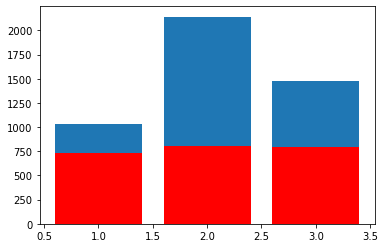

In [286]:
plt.bar(df["City&hospital_tier"], df["City tier"], color='r')
plt.bar(df["City&hospital_tier"], df["Hospital tier"], bottom=df["City tier"])
plt.show()


# 13. Test the following null hypotheses:
a. The average hospitalization costs for the three types of hospitals are not significantly 
different
b. The average hospitalization costs for the three types of cities are not significantly 
different
c. The average hospitalization cost for smokers is not significantly different from the 
average cost for nonsmokers
d. Smoking and heart issues are independent


In [287]:
# H0= DISTRIBUTION OF ALL SAMPLES ARE EQUAL
# H1= DISTRIBUTION OF ONE OR MORE SAMPLES ARE NOT EQUAL

In [288]:
from scipy.stats import friedmanchisquare
data1 = [32097.43]
data2 = [7168.76]
data3 = [10676.83]
stats,p=friedmanchisquare(data1,data2,data3)
print('stats= %.3f,p=%.3f'%(stats,p))
if p> 0.05:
    print("probably the same distribution")
else:
    print("probably different distributions")

stats= 2.000,p=0.368
probably the same distribution


In [289]:
print("median cost of tier 1 city:", final_df[final_df["City tier"]==1].charges.median())
print("median cost of tier 2 city:", final_df[final_df["City tier"]==2].charges.median())
print("median cost of tier 3 city:", final_df[final_df["City tier"]==3].charges.median())


median cost of tier 1 city: 10027.15
median cost of tier 2 city: 8968.33
median cost of tier 3 city: 9880.07


In [290]:
data1 = [10027.15]
data2 = [8968.33]
data3 = [9880.07]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')


stat=2.000, p=0.368
Probably the same distribution


In [291]:
print("median cost of smoker:", final_df[final_df["smoker"]==1].charges.median())
print("median cost of non smoker:", final_df[final_df["smoker"]==0].charges.median())


median cost of smoker: 34125.475
median cost of non smoker: 7537.16


In [292]:
from scipy.stats import kruskal
data1 = [34125.475]
data2 = [7537.16]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')


stat=1.000, p=0.317
Probably the same distribution


In [293]:
#H0: the two samples are independent.
#H1: there is a dependency between the samples.
#d. Smoking and heart issues are independent
from scipy.stats import chi2_contingency
table = [[final_df["Heart Issues"].value_counts()],[final_df["smoker"].value_counts()]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')


stat=191.145, p=0.000
Probably dependent


# ML PART
## 1. Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

In [294]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   object 
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   int64  
 7   City tier               2325 non-null   int64  
 8   State ID                2325 non-null   object 
 9   name                    2325 non-null   object 
 10  BMI                     2325 non-null   float64
 11  HBA1C                   2325 non-null   float64
 12  Heart Issues            2325 non-null   int32  
 13  Any Transplants         2325 non-null   int32  
 14  Cancer history          2325 non-null   

In [295]:
final_df.drop(["Customer ID",'name', 'year', 'month', 'date','State ID'], inplace=True, axis=1)

In [296]:
final_df.shape

(2325, 16)

In [297]:
final_df.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,gender
0,0,563.84,2,3,17.58,4.51,0,0,0,1,0,1,0,0,0,1
1,0,570.62,2,1,17.60,4.39,0,0,0,1,0,1,0,0,0,1
2,0,600.00,2,1,16.47,6.35,0,0,1,1,0,1,0,0,0,0
3,0,604.54,3,3,17.70,6.28,0,0,0,1,0,1,0,0,0,1
4,0,637.26,3,3,22.34,5.57,0,0,0,1,0,1,0,0,0,1


In [298]:
corr = final_df.corr()
corr

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,gender
children,1.000000,0.055901,-0.052438,-0.015760,-0.005339,-0.101379,0.023984,-0.142040,-0.027880,-0.113161,0.017713,-0.013834,0.011666,0.005247,0.002713,0.011205
charges,0.055901,1.000000,-0.446687,0.035300,0.346730,0.139697,0.049299,-0.127028,-0.022522,0.053308,0.838462,-0.150634,0.286956,-0.074636,-0.014374,0.034069
Hospital tier,-0.052438,-0.446687,1.000000,-0.039755,-0.104771,0.057855,0.053376,0.011729,-0.021429,0.033230,-0.474077,0.002455,-0.114685,0.020272,-0.012802,0.041261
City tier,-0.015760,0.035300,-0.039755,1.000000,0.038123,-0.005404,0.023152,0.002970,-0.018639,0.027937,0.032034,0.002766,0.036049,-0.018253,-0.000218,0.054073
BMI,-0.005339,0.346730,-0.104771,0.038123,1.000000,-0.006920,0.017129,0.015893,-0.020235,0.018851,0.107126,-0.208744,0.115671,0.017939,-0.056158,0.079930
HBA1C,-0.101379,0.139697,0.057855,-0.005404,-0.006920,1.000000,0.007699,-0.159855,-0.170921,-0.091594,0.007257,0.033453,0.015525,-0.019513,-0.010989,-0.027339
Heart Issues,0.023984,0.049299,0.053376,0.023152,0.017129,0.007699,1.000000,-0.140269,0.111190,0.206147,-0.007159,-0.027967,0.005852,0.021770,0.007262,0.010277
Any Transplants,-0.142040,-0.127028,0.011729,0.002970,0.015893,-0.159855,-0.140269,1.000000,-0.114677,0.158593,-0.025101,0.064563,-0.058553,-0.066453,0.051867,-0.012737
Cancer history,-0.027880,-0.022522,-0.021429,-0.018639,-0.020235,-0.170921,0.111190,-0.114677,1.000000,0.204208,0.006415,-0.066475,0.011919,0.058222,-0.030704,0.009359
NumberOfMajorSurgeries,-0.113161,0.053308,0.033230,0.027937,0.018851,-0.091594,0.206147,0.158593,0.204208,1.000000,0.017199,-0.002056,0.000208,-0.002098,0.008505,-0.003349


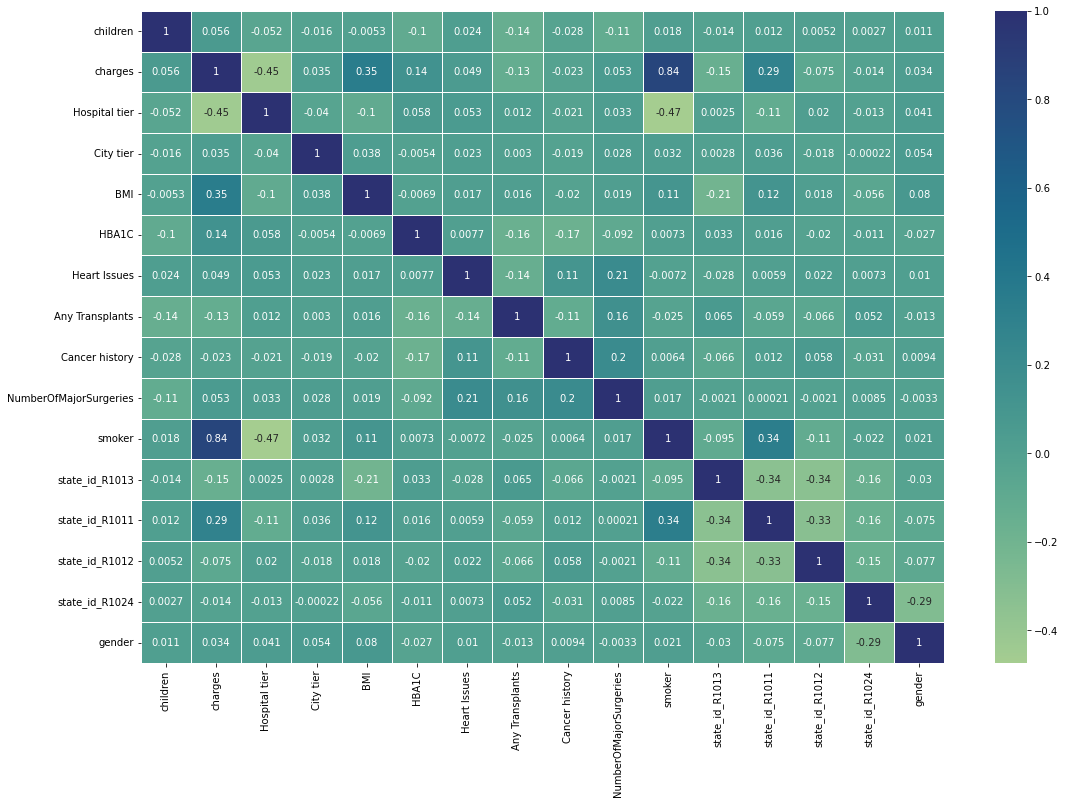

In [299]:
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,linewidth=0.5,cmap='crest')
plt.show()

In [300]:
# from above we find that smpker is directly related to target.

# 2. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. Also, ensure that you apply all the following suggestions:
Note: 
• Perform the stratified 5-fold cross-validation technique for model building and validation
• Use standardization and hyperparameter tuning effectively
• Use sklearn-pipelines
• Use appropriate regularization techniques to address the bias-variance trade-off
## a. Create five folds in the data, and introduce a variable to identify the folds
## b. For each fold, run a for loop and ensure that 80 percent of the data is used to train the model and the remaining 20 percent is used to validate it in each iteration
## c. Develop five distinct models and five distinct validation scores (root mean squared error values)
## d. Determine the variable importance scores, and identify the redundant variable

In [301]:
x = final_df.drop(["charges"], axis=1)
x

,children,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,state_id_R1013,state_id_R1011,state_id_R1012,state_id_R1024,gender
0,0,2,3,17.580,4.51,0,0,0,1,0,1,0,0,0,1
1,0,2,1,17.600,4.39,0,0,0,1,0,1,0,0,0,1
2,0,2,1,16.470,6.35,0,0,1,1,0,1,0,0,0,0
3,0,3,3,17.700,6.28,0,0,0,1,0,1,0,0,0,1
4,0,3,3,22.340,5.57,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,0,1,3,32.800,6.59,0,0,0,0,1,0,1,0,0,1
2330,0,1,2,35.530,5.45,0,0,0,0,1,0,0,1,0,0
2331,1,1,3,38.095,6.05,0,0,0,0,1,0,0,0,1,0
2333,0,2,3,30.360,5.77,0,0,0,0,1,1,0,0,0,1


In [302]:
y = final_df[['charges']]
y

,charges
0,563.84
1,570.62
2,600.00
3,604.54
4,637.26
...,...
2329,52590.83
2330,55135.40
2331,58571.07
2333,62592.87


In [303]:
from sklearn.model_selection import train_test_split

In [304]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=10)

In [305]:
from sklearn.preprocessing import StandardScaler


In [306]:
sc = StandardScaler()

In [307]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [312]:

from sklearn.linear_model import SGDRegressor


In [314]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,0.3,0.4,0.5,
 0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,
 9.0,10.0,20,50,100,500,1000],
 'penalty': ['l2', 'l1', 'elasticnet']}
sgd = SGDRegressor()
# Cross Validation 
folds = 5
model_cv = GridSearchCV(estimator = sgd,
 param_grid = params,
 scoring = 'neg_mean_absolute_error',
cv = folds,
 return_train_score = True,
 verbose = 1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [315]:
model_cv.best_params_


{'alpha': 1.0, 'penalty': 'l1'}

In [316]:
sgd = SGDRegressor(alpha= 100, penalty= 'l1')

In [317]:
sgd.fit(x_train, y_train)

SGDRegressor(alpha=100, penalty='l1')

In [318]:
sgd.score(x_test, y_test)


0.8156509828476364

In [319]:
y_pred = sgd.predict(x_test)

In [320]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [324]:
from sklearn.metrics import mean_squared_error
import math
lin_mse = mean_squared_error(y_test, y_pred)


sgd_mae = mean_absolute_error(y_test, y_pred)
sgd_mse = mean_squared_error(y_test, y_pred)
sgd_rmse = lin_mse*(1/2.0)

In [326]:
print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)

MAE: 3821.0952133680894
MSE: 26831535.878889296
RMSE: 13415767.939444648


In [327]:
importance = sgd.coef_

In [328]:
pd.DataFrame(importance, index = x.columns, columns=['Feature_imp'])

,Feature_imp
children,442.862948
Hospital tier,-681.998607
City tier,0.000000
BMI,2780.358914
HBA1C,1597.105699
Heart Issues,193.326413
Any Transplants,-938.469844
Cancer history,-151.699804
NumberOfMajorSurgeries,832.331929
smoker,9212.383413


# 3. Use random forest and extreme gradient boosting for cost prediction, share your crossvalidation results, and calculate the variable i 

In [329]:
from sklearn.ensemble import RandomForestRegressor

In [330]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [331]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [336]:
score = rf.score(x_test,y_test)
score


0.8618729159763531

In [337]:
y_pred = rf.predict(x_test)

In [338]:

rf_mae = mean_absolute_error(y_test, y_pred)

In [339]:
rf_mae

2922.697647591394

In [340]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model with 1000 decision trees
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
gbr.fit(x_train, y_train)
score = gbr.score(x_test,y_test)
score


0.8219199566044928

In [341]:
y_pred = gbr.predict(x_test)

In [342]:
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_mae

3326.2801930880246

# 4.  Case scenario:Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s 
State ID is R1011. She lives with her partner and two children. She was found to be 
nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no 
transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be 
estimated using tier-1 hospitals 

In [343]:
import datetime 
date = str(19881228)
date1 = pd.to_datetime(date, format = "%Y%m%d")


In [347]:
import datetime as dt
current_date = dt.datetime.now()
current_date

datetime.datetime(2023, 8, 24, 22, 36, 24, 194120)

In [349]:
age = int(12421/365)
age

34

In [354]:
# now with the help of height and weight we will calculate the BMI.
height_m = 170/100
height_sq = height_m*height_m
BMI = 85/height_sq
np.round(BMI,2)


29.41

In [355]:
list = [[2,1,1,24.41,5.8,0,0,0,0,1,1,0,0,34,0]]


In [360]:
df = pd.DataFrame(list, columns = ['children', 'Hospital tier', 'City tier', 'BMI', 'HBA','Heart Issues','Any Transplants',
 'Cancer history','NumberOfMajorSurgeries', 'smoker', 'state_id_R1011','State_ID_R1012 ',
 'State_ID_R1013', 'age', 'gender'] )
df

,children,Hospital tier,City tier,BMI,HBA,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,state_id_R1011,State_ID_R1012,State_ID_R1013,age,gender
0,2,1,1,24.41,5.8,0,0,0,0,1,1,0,0,34,0


# 5. Find the predicted hospitalization cost using all five models. The predicted value should be the mean of the five models' predicted values.
 

In [366]:
Hospital_cost = []

In [367]:
#cost through SGDRegresso
Cost1 = sgd.predict(df)
Hospital_cost.append(Cost1)

In [368]:
#hospitalization cost through Random Forest
Cost2 = rf.predict(df)
Hospital_cost.append(Cost2)

In [369]:
# hospitalization cost throug Extreme gradient Booster
Cost3 = gbr.predict(df)
Hospital_cost.append(Cost3)

In [370]:
avg_cost = np.mean(Hospital_cost)
avg_cost


71979.04847515146